In [30]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from empirical_mdn import *
noise_std = 1
n  = 300 
p =500
y = np.random.uniform(-.5, 2.5, n )
y2 = np.random.uniform(-.5, 2.5, n )
X = y.reshape(-1, 1)  # Reshape y into a 2D array (n_samples, 1)
X = np.hstack((y.reshape(-1, 1), y2.reshape(-1, 1)))
xtrue = np.zeros_like(y)

# Apply conditions to generate xtrue based on y
for i in range(len(xtrue)):
    if (0 < y[i] < 0.5 and  0.5 < y2[i] < 1.5 ) or (1.5 < y[i] < 2 and 0 < y2[i] < 0.5  ):
        xtrue[i] = np.random.normal(1, scale=0.5)
    else:
        xtrue[i] = np.random.normal(-1, scale=0.5)

obs_noise_std = np.random.uniform(0.5,  1.5, len(xtrue))  # Varying noise levels
# Generate x (noisy observations)


v = np.random.rand(p)
rank_1_matrix = np.outer(xtrue, v)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

In [31]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [32]:
mycebmf= cEBMF(data= noisy_matrix,
               prior_L= "emdn",
               X_l= X,
               K=3)

The array does not contain any missing values.


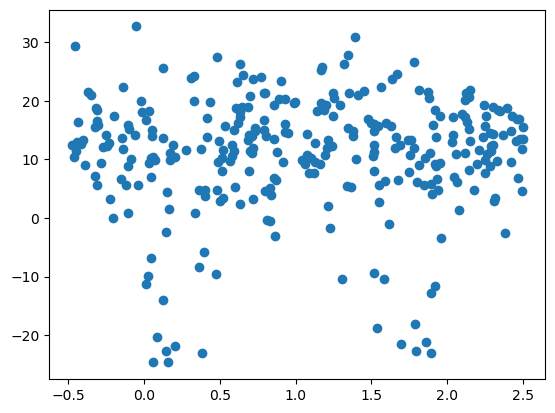

In [33]:
mycebmf.init_LF()
plt.scatter(y, mycebmf.L[:,0])

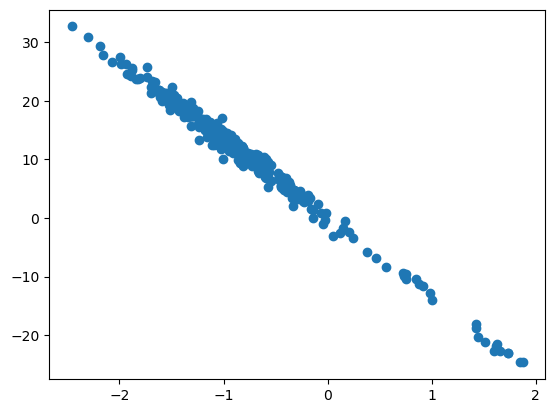

In [34]:
plt.scatter(xtrue, mycebmf.L[:,0])

In [35]:
mycebmfbasic= cEBMF(data= noisy_matrix )
mycebmfbasic.init_LF()

The array does not contain any missing values.


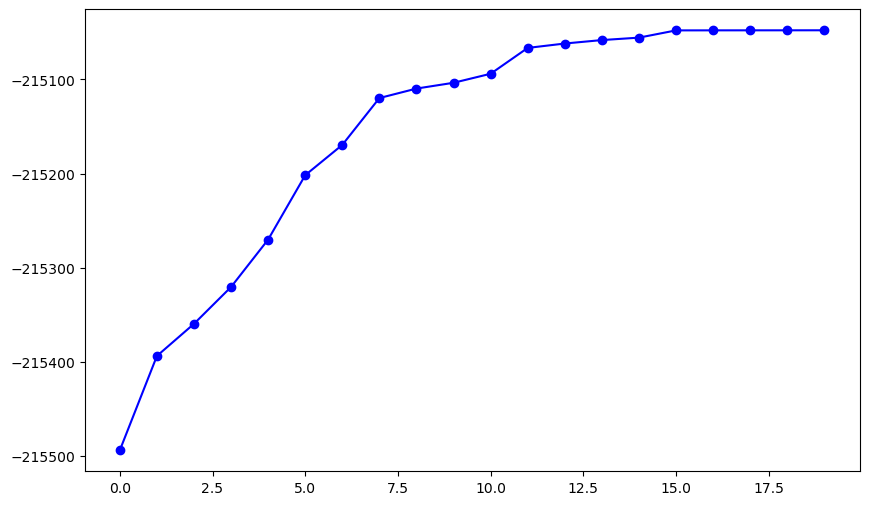

In [36]:
for i in range(20):
    mycebmfbasic.iter()
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmfbasic.obj)[1:], marker='o', linestyle='-', color='b')

In [37]:
mycebmf.L =  -mycebmfbasic.L
mycebmf.L2 = mycebmfbasic.L2
mycebmf.F  = mycebmfbasic.F
mycebmf.F2 = mycebmfbasic.F2
for i in range(20):
    mycebmf.iter()

Epoch 10/100, Loss: 4.8368
Epoch 20/100, Loss: 4.3058
Epoch 30/100, Loss: 3.9929
Epoch 40/100, Loss: 3.8463
Epoch 50/100, Loss: 3.7545
Epoch 60/100, Loss: 3.6856
Epoch 70/100, Loss: 3.6937
Epoch 80/100, Loss: 3.6874
Epoch 90/100, Loss: 3.6667
Epoch 100/100, Loss: 3.6302
Epoch 10/100, Loss: -0.2232
Epoch 20/100, Loss: -0.5842
Epoch 30/100, Loss: -0.5864
Epoch 40/100, Loss: -0.5867
Epoch 50/100, Loss: -0.5869
Epoch 60/100, Loss: -0.5872
Epoch 70/100, Loss: -0.5874
Epoch 80/100, Loss: -0.5874
Epoch 90/100, Loss: -0.5874
Epoch 100/100, Loss: -0.5869
Epoch 10/100, Loss: -0.3488
Epoch 20/100, Loss: -0.9146
Epoch 30/100, Loss: -1.3203
Epoch 40/100, Loss: -2.6576
Epoch 50/100, Loss: -2.0870
Epoch 60/100, Loss: -0.8125
Epoch 70/100, Loss: -0.2798
Epoch 80/100, Loss: -0.9879
Epoch 90/100, Loss: -2.8394
Epoch 100/100, Loss: -3.6712
Epoch 10/100, Loss: 5.0291
Epoch 20/100, Loss: 4.3884
Epoch 30/100, Loss: 4.1285
Epoch 40/100, Loss: 3.8669
Epoch 50/100, Loss: 3.7550
Epoch 60/100, Loss: 3.7909
Epoch

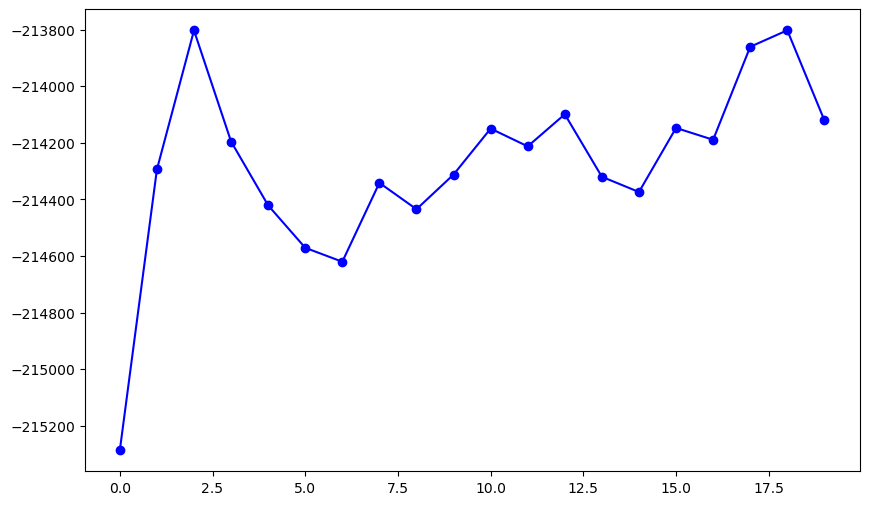

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

The array does not contain any missing values.
[[ 1.         -0.99519073]
 [-0.99519073  1.        ]]
[[ 1.         -0.99519692]
 [-0.99519692  1.        ]]
[[ 1.         -0.99518793]
 [-0.99518793  1.        ]]


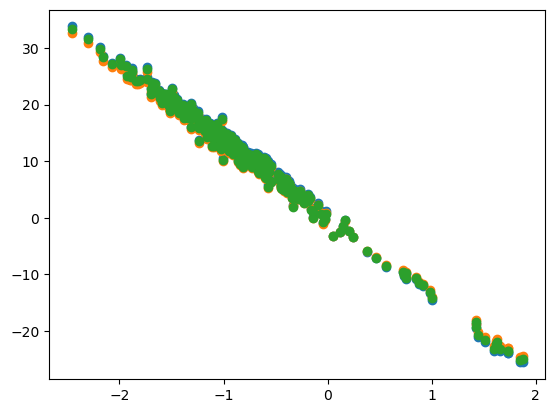

In [39]:

mf= cEBMF(data= noisy_matrix,
               prior_L= "emdn",
               X_l= X,
               K=3)
mf.init_LF()
plt.scatter(xtrue, mycebmf.L[:,0])
plt.scatter(xtrue, mf.L[:,0])
plt.scatter(xtrue, mycebmfbasic.L[:,0])


print( np.corrcoef(xtrue, mycebmf.L[:,0]))
print( np.corrcoef(xtrue, mf.L[:,0]))
print( np.corrcoef(xtrue, mycebmfbasic.L[:,0]))

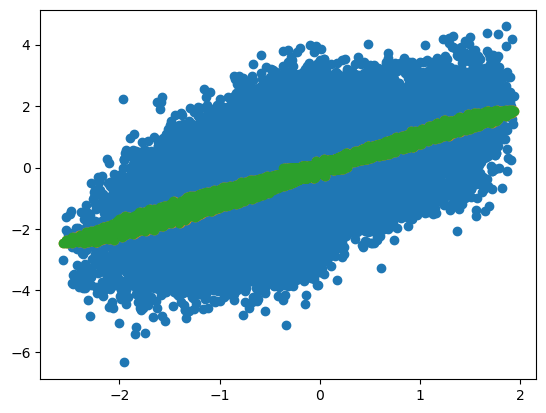

In [40]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(mycebmfbasic.Y_fit, rank_1_matrix)

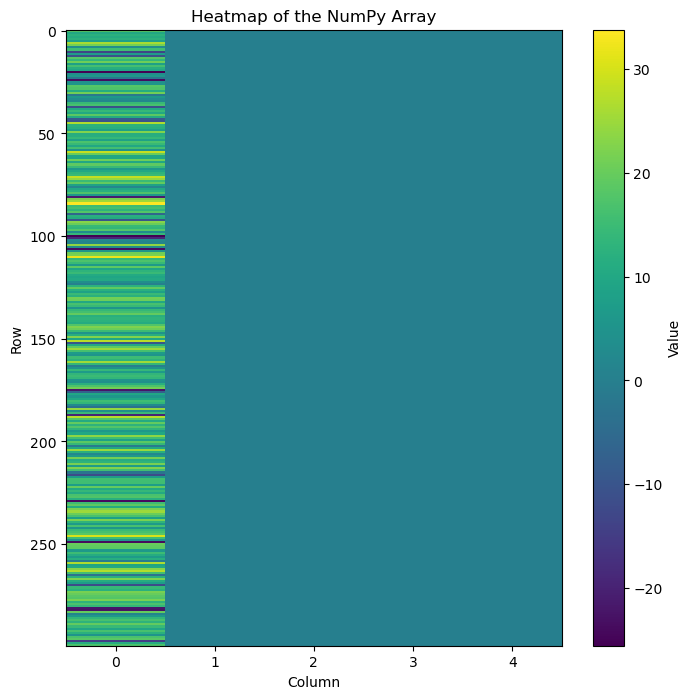

In [41]:
plt.figure(figsize=(8, 8))  # You can adjust the size here
plt.imshow(mycebmf.L, cmap='viridis', aspect='auto', interpolation='nearest')  # 'aspect' set to auto for better scaling
plt.colorbar(label="Value")
plt.title("Heatmap of the NumPy Array")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


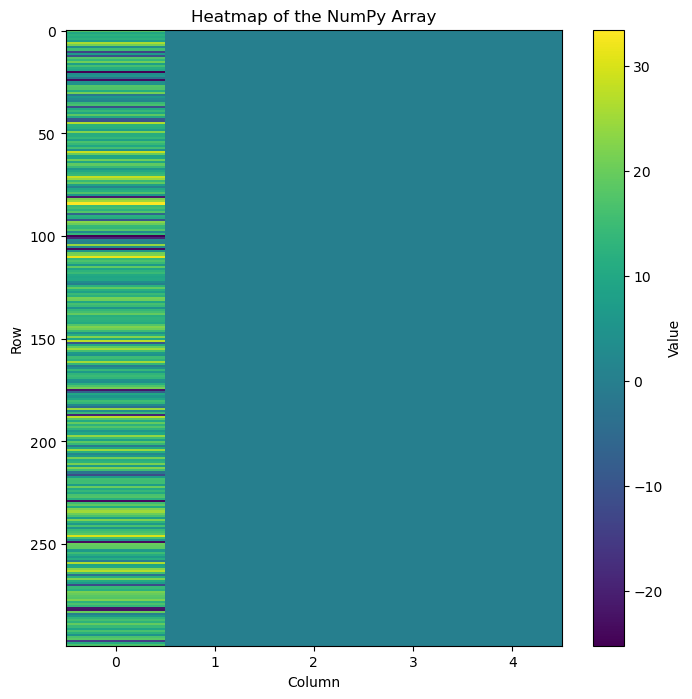

In [42]:
plt.figure(figsize=(8, 8))  # You can adjust the size here
plt.imshow(mycebmfbasic.L, cmap='viridis', aspect='auto', interpolation='nearest')  # 'aspect' set to auto for better scaling
plt.colorbar(label="Value")
plt.title("Heatmap of the NumPy Array")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


In [43]:
np.sqrt(np.mean( (mycebmf.Y_fit -rank_1_matrix )**2))

0.07244453551863014

In [44]:
np.sqrt(np.mean( (mycebmfbasic.Y_fit -rank_1_matrix )**2))

0.07248311972992438

0.07244453551863014
0.07244404948862801
0.07248311972992438
0.07278676584418728


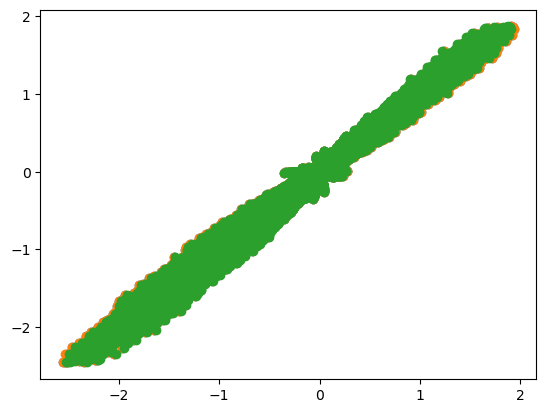

In [45]:
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)
plt.scatter(np.outer(mycebmfbasic.L[:,0],mycebmfbasic.F[:,0] ), rank_1_matrix)
print(np.sqrt(np.mean( (mycebmf.Y_fit -rank_1_matrix )**2)))
print(np.sqrt(np.mean( ( np.outer(mycebmf.L[:,0],mycebmf.F[:,0] )-rank_1_matrix )**2)))
print(np.sqrt(np.mean( (mycebmfbasic.Y_fit -rank_1_matrix )**2)))
print(np.sqrt(np.mean( (np.outer(mycebmfbasic.L[:,0],mycebmfbasic.F[:,0] )-rank_1_matrix )**2)))

In [23]:
tt=  mycebmf.Y_fit= np.sum( [np.outer(   mycebmf.L[:, k]  ,  mycebmf.F[:, k]    ) for k in range( mycebmf.K)], axis=0)

print(np.sqrt(np.mean( ( tt-rank_1_matrix )**2)))

0.07532493914798728


In [24]:
mycebmf.L

array([[ 1.14336210e+01,  5.29552537e-01, -4.25376793e-02,
        -3.09922163e-54,  2.40160924e-50],
       [ 4.52512366e+00,  5.61074228e-01, -4.69153501e-02,
         2.54880424e-54,  4.19908337e-52],
       [ 2.00325903e+01,  4.31184147e-01, -3.60867370e-02,
        -1.50952135e-54,  2.99084095e-50],
       ...,
       [ 1.35099956e+01, -4.44984538e-03, -3.82456783e-02,
        -1.68121269e-54,  1.02302349e-50],
       [-1.49896365e+01,  4.74454551e-01, -3.80843774e-02,
         6.42664645e-54,  9.80339724e-51],
       [-1.08949352e+01,  6.13114670e-01, -3.61144422e-02,
         1.64630222e-55, -1.69077353e-50]])